#### The purpose of this notebook is to confirm that the # of crosslinks satisfied correlates with a better (lower) score.

In [2]:
import IMP 
import IMP.rmf
import IMP.atom
import RMF 
from pathlib import Path
import pandas as pd

In [70]:
def get_em_rmsd(i): 
    file_1 = Path(Path.home(), "mtorc2/single_traj_experiments/exp_3/17/sample/output_0/initial.0.rmf3")
    file_2 = Path(Path.home(), "mtorc2/single_traj_experiments/exp_3/17/sample/output_0/rmfs/0.rmf3")

    ref_fh   = RMF.open_rmf_file_read_only(str(file_1))
    sample_fh = RMF.open_rmf_file_read_only(str(file_2))
    ref_m  = IMP.Model()
    sample_m  = IMP.Model()
    ref_h = IMP.rmf.create_hierarchies(ref_fh, ref_m)[0]
    sample_h = IMP.rmf.create_hierarchies(sample_fh, sample_m)[0]
    IMP.rmf.load_frame(sample_fh, i)

    ref_ps = IMP.atom.Selection(ref_h, molecules=['MTOR', 'MLST8', 'RICTOR'], resolution=1, copy_index=0).get_selected_particles()
    sample_ps = IMP.atom.Selection(sample_h, molecules=['MTOR', 'MLST8', 'RICTOR'], resolution=1, copy_index=0).get_selected_particles()

    t = IMP.atom.get_transformation_aligning_first_to_second(sample_ps, ref_ps)
    # IMP.atom.transform(sample_h, t) # transform the hierarchy in place
    rmsd = IMP.atom.get_rmsd_transforming_first(t, sample_ps, ref_ps)
    return rmsd 


In [71]:
ref_ps = IMP.atom.Selection(ref_h, molecules=['MTOR', 'MLST8', 'RICTOR'], resolution=1, copy_index=0).get_selected_particles()
sample_ps = IMP.atom.Selection(sample_h, molecules=['MTOR', 'MLST8', 'RICTOR'], resolution=1, copy_index=0).get_selected_particles()


In [23]:
print(len(ref_ps))
print(len(sample_ps))

3637
3637


In [58]:
df_file = Path(Path.home(), "mtorc2/single_traj_experiments/exp_3/17/analysis/traj/scores_info_0.csv")
score_df = pd.read_csv(df_file)
score_df["XL_sum"] = score_df["XLs_DSS"] + score_df["XLs_EDC"]
score_df.head()


,Unnamed: 0,MC_frame,rmf_frame_index,Total_Score,XLs_DSS,XLs_EDC,XLs_psi_DSS,XLs_psi_EDC,CR_sum,EV_sum,traj,rmf3_file,half,XL_sum
0,0,0.0,0.0,190772.362789,11.384699,8.060641,-1.386294,-1.386294,0.0,12.177626,output_0,output_0/rmfs//0.rmf3,A,19.445340
1,1,1.0,1.0,103596.104308,11.595007,8.213178,-1.386294,-1.386294,0.0,7.948551,output_0,output_0/rmfs//0.rmf3,A,19.808184
2,2,2.0,2.0,58490.349563,10.652202,8.217079,-1.386294,-1.386294,0.0,1.620390,output_0,output_0/rmfs//0.rmf3,A,18.869281
3,3,3.0,3.0,40175.511443,8.920751,7.669104,-1.386294,-1.386294,0.0,0.294068,output_0,output_0/rmfs//0.rmf3,A,16.589855
4,4,4.0,4.0,30415.249518,8.603198,7.406912,-1.386294,-1.386294,0.0,0.288038,output_0,output_0/rmfs//0.rmf3,A,16.010110


In [24]:
t = IMP.atom.get_transformation_aligning_first_to_second(sample_ps, ref_ps)
# IMP.atom.transform(sample_h, t) # transform the hierarchy in place
IMP.atom.get_rmsd_transforming_first(t, sample_ps, ref_ps)



32.44858480090884

In [39]:
xl_df = pd.read_csv(Path(Path.home(), "mtorc2/single_traj_experiments/exp_3/17/analysis/XLs_sat.csv"))
xl_df.head()


,Unnamed: 0,MTOR_1197_RICTOR_516,MTOR_1218_RICTOR_516,RICTOR_1092_MTOR_1993,MTOR_1186_RICTOR_516,RICTOR_1477_MTOR_2045,MTOR_1186_RICTOR_507,MTOR_1218_RICTOR_507,MTOR_42_RICTOR_1382,RICTOR_1477_MTOR_2090,...,MTOR_1805_MTOR_1868,MTOR_2489_MTOR_2496,MTOR_1662_MTOR_2218,MTOR_1256_MTOR_1293,MTOR_425_MTOR_384,MTOR_298_MTOR_309,MTOR_980_MTOR_1256,MTOR_309_MTOR_2370,inter_xl_sat,intra_xl_sat
0,0,102.554312,104.374791,24.748026,94.997743,35.106225,94.645708,103.974616,89.764430,37.277955,...,15.244655,14.806241,10.503358,59.981031,22.190801,4.972822,41.803484,96.959503,1,27
1,1,54.314660,61.300289,48.235014,52.872664,29.186888,55.426163,63.435400,81.006678,28.877556,...,15.244655,15.617336,18.560917,57.075807,21.407552,8.437913,39.026153,105.765573,5,27
2,2,55.881727,62.629766,50.243020,53.913545,27.569246,55.293734,63.337048,78.533652,28.340435,...,15.244655,16.503391,18.560917,53.796637,21.745318,10.938834,35.670574,105.916372,5,27
3,3,36.166743,42.041044,44.631190,32.316302,22.881064,41.064888,50.052408,66.483190,23.349055,...,15.244655,17.069972,18.560917,51.680791,21.456253,15.408668,33.643301,107.324838,5,28
4,4,30.385730,35.839589,52.900461,27.233269,26.335569,37.754734,45.698809,64.880648,31.411387,...,15.244655,15.715333,18.560917,48.396063,20.697406,17.793976,30.424595,109.310573,6,31


In [60]:
xl_sats = list() 
total_scores = list() 
for i in range(len(score_df)): 
    xl_sat = xl_df.iloc[i, xl_df.columns.get_loc('inter_xl_sat')] + xl_df.iloc[i, xl_df.columns.get_loc('intra_xl_sat')] 
    xl_sats.append(xl_sat)
    total_score = score_df.iloc[i, score_df.columns.get_loc("XL_sum")]
    total_scores.append(total_score)
    

(0.0, 25.0)

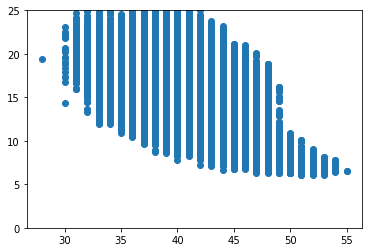

In [61]:
import matplotlib.pyplot as plt
plt.scatter(xl_sats, total_scores)
plt.ylim(0,25)

In [65]:
best_score_df = score_df.nsmallest(20, columns=["XL_sum"])

In [74]:
em_rmsds = list() 
for index in list(best_score_df.index): 
    print(index)
    em_rmsds.append(get_em_rmsd(index))
    
best_score_df["em_rmsd"] = em_rmsds
best_score_df.head()

94950
94937
94942
94938
94951
96935
94956
94940
90201
94941
90202
96931
96878
91692
90175
96879
91727
94969
91687
94932
90198
91724
91728
91726
95337
96875
91906
91735
91722
94946
91723
12729
12735
90191
91731
96862
90177
96979
94961
94939
12728
90200
9074
91907
91654
96885
96887
91721
12754
96888
96876
90157
90176
12736
91736
90207
90190
94957
12730
91729
91720
96807
94962
12731
90208
12749
91903
96826
90179
91704
12753
96937
37998
96975
90158
91884
96860
90194
37977
96971
91694
96980
12750
96827
94949
96829
91732
93820
9066
17256
96866
8901
91889
91696
12197
91730
90178
94963
12732
91782


,Unnamed: 0,MC_frame,rmf_frame_index,Total_Score,XLs_DSS,XLs_EDC,XLs_psi_DSS,XLs_psi_EDC,CR_sum,EV_sum,traj,rmf3_file,half,XL_sum,em_rmsd
94950,94950,94950.0,94950.0,36.961206,4.410274,1.670900,-1.386294,-1.386294,0.000000,0.0,output_0,output_0/rmfs//0.rmf3,A,6.081174,125.092660
94937,94937,94937.0,94937.0,37.722221,4.455576,1.642295,-1.386294,-1.386294,0.000000,0.0,output_0,output_0/rmfs//0.rmf3,A,6.097872,125.714386
94942,94942,94942.0,94942.0,32.625728,4.436166,1.678427,-1.386294,-1.386294,1.978202,0.0,output_0,output_0/rmfs//0.rmf3,A,6.114593,125.693244
94938,94938,94938.0,94938.0,32.072301,4.461366,1.658715,-1.386294,-1.386294,0.000000,0.0,output_0,output_0/rmfs//0.rmf3,A,6.120081,125.877519
94951,94951,94951.0,94951.0,43.067822,4.499828,1.649915,-1.386294,-1.386294,0.000000,0.0,output_0,output_0/rmfs//0.rmf3,A,6.149743,125.605459


In [75]:
best_score_df["em_rmsd"].mean()

102.23811546319814